In [1]:
import os, time
from scipy import stats
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Wed, 09 Oct 2019 15:07


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
display(_df)

,observed,modeled,diff
@facilitytype,,,
Freeway,"31,066,870","32,524,920","1,458,050"
HOV,"108,593","111,865","3,272"
Principal Arterial,"139,789","159,444","19,655"
Ramp,"29,383","24,777","-4,606"
Total,"31,344,635","32,821,006","1,476,371"


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df

,observed,modeled,diff
county,,,
King,"23,323,275","24,286,374","963,099"
Pierce,"2,983,025","3,423,763","440,738"
Snohomish,"5,038,335","5,110,869","72,534"
Total,"31,344,635","32,821,006","1,476,371"


----
### Scatterplots 

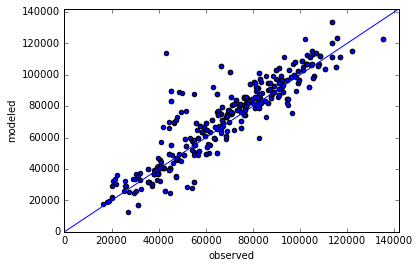

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.913414707977


---
By County

King r^2: 0.922433206702
Pierce r^2: 0.606744055632
Snohomish r^2: 0.980663558125


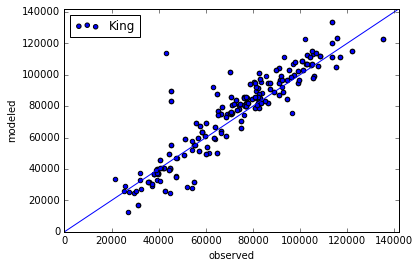

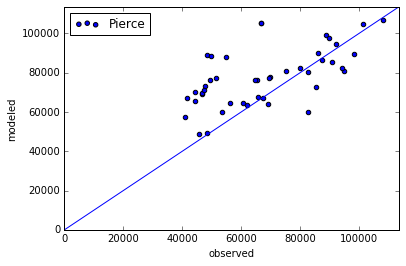

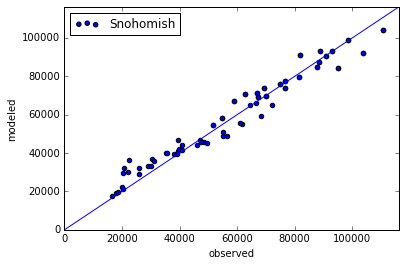

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.906118508718
r^2 Principal Arterial: 0.811695825034


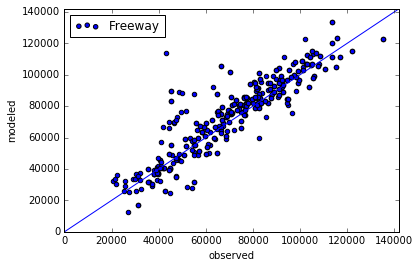

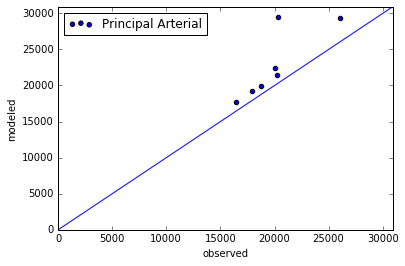

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df

,name,observed,modeled,diff
0,AUBURN - SOUTH KING,"568,417","546,875","-21,542"
1,KENT,"550,322","501,945","-48,377"
2,SEATTLE - SOUTH OF CBD,"526,500","511,695","-14,805"
3,SHIP CANAL,"519,802","539,779","19,977"
4,KIRKLAND-REDMOND,"414,120","395,804","-18,316"
5,MILL CREEK,"400,848","396,424","-4,424"
6,SOUTH BELLEVUE,"399,500","368,661","-30,839"
7,SEATTLE - NORTH,"372,000","377,437","5,437"
8,TACOMA - EAST OF CBD,"312,164","326,477","14,313"
9,PARKLAND,"304,322","269,270","-35,052"


r^2 : 0.992055022802


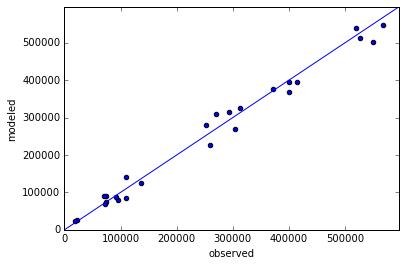

In [12]:
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv', index_col='agency_name')
df[['observed','modeled','diff']] = df[['observed','modeled','diff']].astype('float')
df.drop('perc_diff', axis=1, inplace=True)
df.sort_values('observed', ascending=False)

,observed,modeled,diff
agency_name,,,
King County Metro,"421,902","476,851","54,949"
Sound Transit,"159,193","136,003","-23,190"
Community Transit,"32,480","36,693","4,213"
Pierce Transit,"28,597","42,345","13,748"
Washington Ferries,"18,287","4,184","-14,103"
Kitsap Transit,"8,922","17,731","8,809"
Everett Transit,"3,558","2,228","-1,330"


----
### Key Routes

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed','modeled']] = df[['observed','modeled']].astype('float')
df = df.drop('perc_diff',axis=1)
df.sort_values('observed', ascending=False)

,agency_name,observed,modeled,diff
description,,,,
LightRail SeaTac-Sea,Sound Transit,"77,498","47,078","-30,420"
E-Line E-Line Rapid*,King County Metro,"17,389","20,107","2,718"
COMMTR RL TAC-SEA,Sound Transit,"16,359","9,894","-6,465"
D Line D-Line Rapid*,King County Metro,"14,493","14,344",-149
40 CBD-NGTC via Fre*,King County Metro,"12,440","14,709","2,269"
C Line C-Line Rapid*,King County Metro,"12,429","13,744","1,315"
7 Route 7,King County Metro,"11,309","10,555",-754
A Line A-Line Rapid*,King County Metro,"10,168","9,359",-809
550 Bellevue-Seattle,Sound Transit,"9,738","15,949","6,211"


---
### Lines by Agency

r^2 Community Transit: 0.875341834186
r^2 Everett Transit: -0.340641987406
r^2 King County Metro: 0.94180609655
r^2 Kitsap Transit: 0.190940321926
r^2 Pierce Transit: 0.935991745395
r^2 Sound Transit: 0.953354146826
r^2 Washington Ferries: 0.866458991774


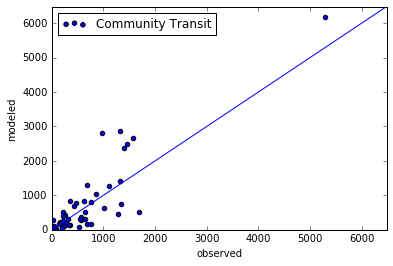

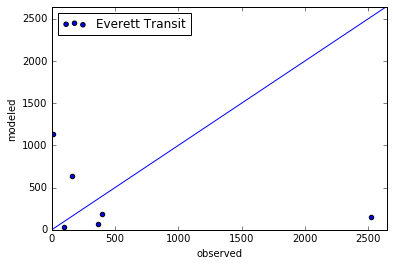

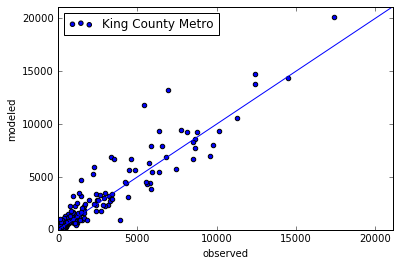

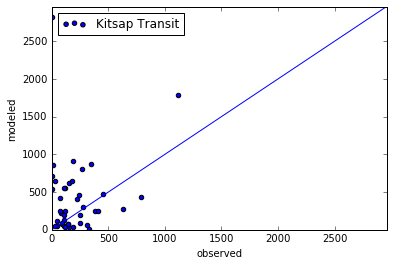

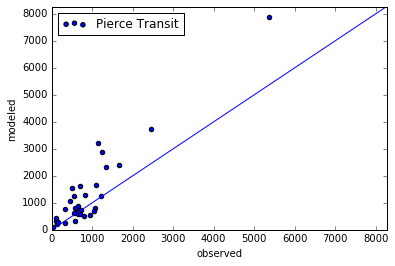

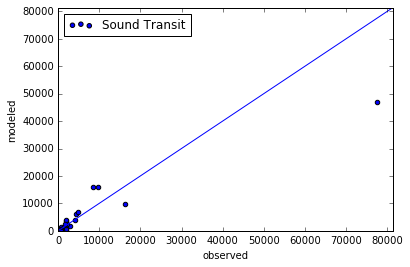

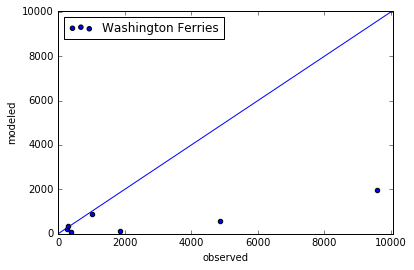

In [15]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency_name')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=agency)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [16]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df

,observed,modeled
station_name,,
Husky Stadium,"10,517","5,567"
Westlake,"12,179","6,829"
University St,"5,872","5,000"
Pioneer Square,"4,317","3,473"
Int'l District,"6,308","2,875"
Capitol Hill,"7,837","5,658"
Stadium,"2,136",489
SODO,"2,354","2,388"
Beacon Hill,"2,890","1,251"


In [ ]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed','modeled']]
df_combined['diff'] = df_combined['modeled']-df_combined['observed']

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

# Stop Transfers

### Light Rail

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.26,-99.00,99.26,-1.00
Westlake,0.36,0.36,-0.00,-0.01
University St,0.56,0.20,0.36,1.81
Pioneer Square,0.63,0.16,0.47,2.98
Int'l District,0.78,0.45,0.33,0.73
Capitol Hill,0.07,-99.00,99.07,-1.00
Stadium,0.45,0.12,0.33,2.80
SODO,0.47,0.31,0.16,0.51
Beacon Hill,0.37,0.35,0.02,0.05


# Externals

In [18]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.2f}'.format
df

,external_station,observed,modeled,diff
location,,,,
I-5 to Olympia,"3,733.00","130,000.00","152,685.08","22,685.08"
I-5 to Mount Vernon,"3,744.00","67,000.00","65,274.40","-1,725.60"
I-90 @ Snoqualmie Pass,"3,739.00","33,000.00","29,755.04","-3,244.96"
SR-532 to Camano Island,"3,746.00","23,000.00","20,707.72","-2,292.28"
SR-507 to Yelm,"3,734.00","23,000.00","19,142.39","-3,857.61"
SR-3 to Belfair,"3,749.00","18,000.00","21,027.57","3,027.57"
Hood Canal Bridge,"3,748.00","18,000.00","17,687.74",-312.26
SR-530 N/O Stanwood,"3,745.00","9,100.00","8,073.09","-1,026.91"
Mukilteo-Clinton Ferry,"3,747.00","6,300.00","7,633.39","1,333.39"
